# A Machine Learning Approach to Exoplanets Discovery
## Machine Learning Engineer Nanodegree

##### Salvatore Mitrano

August 9th, 2016

## I. Definition

### Project Overview
In early October, twenty years ago, Michel Mayor and Didier Queloz of the Geneva Observatory in Switzerland made an announcement [1] destined to become history: the discovery of an Exoplanet orbiting a star similar to the Sun, the 51 Pegasi star, 48 light-years away towards the constellation of Pegasus. For the uninformed reader, an exoplanet is a planet outside our solar system orbiting a star other than our sun. Since then, the race to the discovery of exoplanets began. However, just recently, with the advancement in technology and the launch of space telescopes like [Kepler](http://kepler.nasa.gov/), exoplanetary discovery has boomed. Since this is just the beginning to exoplanetary discovery, [more mission are being scheduled to discover exoplanets](http://www.searchforlife.net/exoplanet-missions/), the purpose of this project is to create a model, using machine learning, that will allow scientist and researchers to simplify the process of discovery.

### Problem Statement

The main problem in exoplanetary discovery is that scientist and researchers take a long time to check if there is a candidate planet orbiting a star. This project proposes an alternative method, using machine learning, to discover exoplanets orbiting a star. Before explaining the approach taken to solve this problem, some terminology has to be described:
- A **Light Curve** is a graph that represent the change in brightness of a star over time.
- A **Planetary Transit** is a astronomical method used for the discovery of exoplanets. The method consists in the detection of the decrease in brightness of the light curve of a star when a planet passes in front of the parent star. The decrease in brightness is related to the relative size of the parent star, the planet and its orbit. As you can see in the Figure below, as the planet passes through the star, the brightness of the star diminish. To understand this topic further, I suggest watching this [youtube video](https://www.youtube.com/watch?v=nO9tdUROMhg)![Planetary Transit](images/transit_light_curve.png "Planetary Transit")
- **The Kepler Telescope** is a space telescope whose purpose is the research and confirmation of Earth-like planets orbiting stars other than the Sun. The Kepler telescope was "specifically designed to monitor a portion of our region of the Milky Way and discover dozens of Earth-like planets in or near the habitable zone and determine how many of the billions of stars in our galaxy possess planets." [2]

The Kepler telescope, which has been in function since 2009, thanks to scientists, has confirmed 2290 planets, discovered 4120 False Positive exoplanets, and has still 2416 candidates Planets to be confirmed or debunked. The approach that I took was to work with the raw data collected by the Kepler telescope between 2009 and 2013, use the already confirmed exoplanets and false positive to train a machine learning algorithm to recognize future planets. The last step was to apply the trained algorithm to the still candidate exoplanet and check the results.

### Metrics
During this project, one type of metrics have been used: Precision.

Precision is a pretty common metric used in binary classifiers. As a matter of fact, differently from the f1 metric, which is a weighted average of precision and recall, precision only take into account true positive over true positive plus false positive. The choice of using precision is due to the fact that this is a discovery project; therefore; I am more concern of the true positive results. Indeed, if a planet is categorized as “false negative” it status will remain still candidate, because there are no strong evidences to promote it as false negative
![Accuracy Metric](images/precision-formula.png "Accuracy Metric")

Moreover I used the confusion matrix for a visual justification on how the model was performing, checking false positive and false negatives

The confusion matrix is another common metric used in binary classifiers. It is a table that describes the performance of a classifier, showing the number of the correct true positive, false positive, true negative, false negative.
![Confusion Matrix](images/confusion_matrix.png "Confusion Matrix")

### Frameworks and Libraries
Except for all the usual python Libraries used during the course of the Nanodegree such as Sklearn, Numpy, and Pandas, the following libraries have been used in the project:
- **[kplr](http://dan.iel.fm/kplr/)** is a python interface to the Kepler data. It allows to search the Kepler data catalog and retrieve the light-curves of a planet, just referencing the KOI (Kepler Object of Interest) name. **_[Need to be installed]_**
- **[PyFITs](http://www.stsci.edu/institute/software_hardware/pyfits)** is a python library that allows reading and processing of FITs files. Flexible Image Transport System or more commonly (FITS) is an open standard file format useful for storage of scientific and other images. FITS files are most commonly used in astronomy. **_[Need to be installed]_**
- **[Joblib](https://pythonhosted.org/joblib/installing.html)** is a python pipelining for simple parallel computing. **_[Need to be installed]_**
- **[PyKE](http://keplerscience.arc.nasa.gov/PyKE.shtml)** is a software developed by nasa that allows to process and normalize the Kepler Data. **_[Already included in the project]_**

The first three libraries are easily installable using pip. Here are the commands for the terminal:

*pip install kplr*

*pip install pyfits*

*pip install joblib*

## II. Analysis

### Data Exploration
The first step towards analyzing and creating a model to recognize exoplanets was to find a reliable source to collect information about the exoplanets processed by the Kepler telescope. Thanks to the [Kepler Exoplanet Archive](http://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative), I was able to find a list of all the planets processed by the Kepler telescope with their relative Kepler Object of Interest(KOI), and status (Confirmed, False Positive, and Candidate). Subsequently, I used the Kplr python library to pull the light curves of each planet retrieved from the Kepler Exoplanet Archive. The light curves are a time series representation; therefore, each time data point in the data of the light curves has some attribute related with it [3]. The attributes of the light curve stored in the FITs files include:
- **TIME**: The time at the mid-point of the cadence in BKJD (Kepler Barycentric Julian Day).
- **TIMECORR**: The barycenter correction calculated by the pipeline plus the time slice correction.
- **SAP_FLUX**: The flux in units of electrons per second contained in the optimal aperture pixels collected by the spacecraft.
- **SAP_FLUX_ERR**: The error in the simple aperture photometry as determined by PA in electrons per second.
- **SAP_BKG**: The total background flux summed over the optimal aperture in electrons per second.
- **SAP_BKG_ERR**: The 1-sigma error in the simple aperture photometry background flux.
- **PDCSAP_FLUX**: The flux contained in the optimal aperture in electrons per second after the PDC module has applied its co-trending  algorithm.
- **PDCSAP_FLUX_ERR **: The 1-sigma error in PDC flux values.
- **SAP_QUALITY**: Flags containing information about the quality of the data.
- **PSF_CENTR1**: The column centroid calculated by fitting the point-spread function.
- **PSF_CENTR1_ERR**: The 1-sigma error in PSF-fitted column centroid.
- **PSF_CENTR2**: The row centroid calculated by fitting the point-spread function.
- **PSF_CENTR2_ERR**: The 1-sigma error in PSF-fitted row centroid.
- **MOM_CENTR1**: The column value for the flux-weighted centroid position of the target at this cadence.
- **MOM_CENTR1_ERR**: The 1-sigma error in the column value for the first moment centroid position.
- **MOM_CENTR2**: The row value for the flux-weighted centroid position of the target at each cadence.
- **MOM_CENTR2_ERR**: The 1-sigma error in the row value for the first moment centroid position.
- **POS_CORR1**: The column component of the local image motion calculated from the motion polynomials.
- **POS_CORR2**: The row component of the local image motion calculated from the motion polynomials.

The light curve files for each star are divided into quarters; thus, the quarters needed to be stitched together. Moreover, since the Flux of electrons came with different sorts of systematic and environmental errors, the flux needed to be normalized and detrended. This step was easily accomplished thanks to PyKE library, which allows stitching quarters together and detrending data. The picture below shows the light curve from the star K-752 before and after the normalization process.
![Normalized K752](images/K752.01.png "Normalized K752")

Subsequently, I needed a way to compare the time series of flux of two stars. Therefore, I ended up using an algorithm called Dynamic Time Warping (DTW), which is widely common for the comparison of two time series [4][5]. The Dynamic Time Warping algorithm finds an optimal match between two sequences of feature vectors which allows for stretched and compressed sections of the sequence. I decided to choose a star that had a regular planetary transit in its light curve as a baseline for comparison.

Finally, I created a table with the DTW comparison of the 3 different fluxes and the statistical attributes (mean, std, min, max) of the following: **_SAP_FLUX, SAP_BKG, PDCSAP_FLUX, DETSAP_FLUX, MOM_CENTR1, MOM_CENTR2, POS_CORR1, POS_CORR2 _**. These values provided important features of a light curve data.

One thing to be notice is that the DTW algorithm do not always find a comparison value for two time series. Therefore, after processing all the planets, form the 8825 planets processed by the Kepler telescope, 18.03% (1595 planets) is eliminated from the training data for the machine learning implementation.

The picture below gives a little bit of intuition on how the DTW algorithm works.


![Dynamic Time Warping](images/dynamic-time-warping.jpg "Dynamic Time Warping")

### Exploratory Visualization
The figure below shows the 7 most relevant features of the data set. I chose seven oust for the sake of visualization. You can see all of them on the implementation section. As you can see, the choice of detrending the data and apply the Dynamic Time Warping algorithm on the light curve, really paid off. Indeed, the most relevant feature is the DTW of the detrended flux, and the second, third and forth most relevant features are the standard deviation, mean, and minimum of the detrended flux. This graph has been generated fitting the entire data to a Random Forrest Classifiers, extracting the importance of each features. In the implementation phase you will see how this plays a role on reducing the number of features. The blue lines represent the standard deviation of each feature.

![Features Importance](images/features_importance.png "Features Importance")

### Algorithms and Techniques
The algorithms I will use for this project are the most common methods used for classification problems. This includes:
- Naive Bayes
- Logistic Regression
- Random Forest
- Support Vector Machines (SVM)


I choose Naive Bayes because is a super simple classifier. Indeed, if the conditional independence assumption holds, a Naive Bayes classifier will converge quicker than the other 3 classifiers I have chosen. 
I choose Logistic Regression because it is a classifier that has a lots of ways to regularize the model, and I don't have to to worry about correlated features, differently from Naive Bayes.
I choose Decision Tree because it is a non-parametric classifier and I don't have to worry if the data is not linearly separable.
I choose SVM because of it Hight accuracy and theoretical guarantees regarding overfitting.


I will use the precision metric to see which one performs best according to the dataset and then I will tune the parameters for that algorithm to improve its performance. I decided to follow this route due to the unpredictability and similarity of the dataset data points. As a matter of fact, each data point is very similar even if the two classes are very distinct (Confirmed, False Positive).

### Benchmark
Since this is a research project, there are not real clear benchmarks. However, thanks to the Confusion Matrix and K-folds method, some metrics, to test the performance of the different algorithms, are available. I am expecting that the best algorithm will have an precision metric of at least 60%. I choose 60% because I believe that it will be able to fit the data; however; it will not be able to make good predictions due to the fact that the data set is really sensitive to and very close, even if the categories are really different.  Moreover, when applying the model to the still candidate planets, which the researchers are still evaluating, I am expecting to find no more than 5 planets to be confirmed, with a discovery rate lower than 1%. This low margin is due to the fact that human have categorized the dataset of exoplanet as Confirmed or False Negative. Therefore, I do not believe that the algorithm, with that human bias pre-built into it, will able to recognize plates that the humans could not. I believe will find some exoplanets that the human eye could not recognize.

## III. Methodology

### Libraries Import

In [1]:
# Import Generic libraries
import numpy as np
import pandas as pd
from time import time
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

This first import is needed to add all the libraries for processing the kepler data.

In [2]:
# Import Libraries to process the kepler Data
import kplr
import pyfits
from PyKE.kepstitch import kepstitch
from PyKE.kepflatten import kepflatten
from algorithms.dtw import LB_Keogh

# Import Library for parallel computing
import multiprocessing
from joblib import Parallel, delayed

This second import is needed to add all the libraries to apply the machine learning algorithm to the processed data.

In [3]:
# Import SkLearn libraries
# Import Metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

# Import Machine learning Algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Import Cross Validation and Grid Searcch Libraries
from sklearn.cross_validation import train_test_split, KFold
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import ExtraTreesClassifier

### Data Preprocessing

Processing the Kepler data was the most difficult task of the project. As a matter of fact, each start had approximately 1 GB of information. Moreover, the algorithms used to stitch and detrend the data were of order O(n^2), adding more delay to the process. To process all of the planets, I had to rent a supercomputer with 32 cores through [Domino Data Labs](https://www.dominodatalab.com/). If I would have processed all the data with my computer that has 4 cores, the process would have taken 30 Days. Instead, with Domino's platform, it took approximately 2 days.


The first step in the data analysis process was to read the list of planets from the Kepler telescope collected from the Kepler Exoplanet Archive. Subsequently, get some sense of the data.

In [4]:
# Setting up log filename
LOG_FILENAME = 'processing_kepler_data.log'

# Read the planets list from the csv file
planets = pd.read_csv('data/candidate_planets.csv')

# Remove Baseline light curve chosen
planets = planets.ix[2:]

# Remove the K and transorm to float type allowing KPLR Library to process the name
planets['kepoi_name'] = planets['kepoi_name'].str.replace('K', '').astype(float)

# Get Some Count of the data
confirmed = planets.loc[planets['koi_disposition'] == 'CONFIRMED']
false_positive = planets.loc[planets['koi_disposition'] == 'FALSE POSITIVE']
candidate = planets.loc[planets['koi_disposition'] == 'CANDIDATE']

print "Number of total Planets: {}, Confirmed: {}, False Positive: {}, Candidates: {}" \
    .format(planets.shape[0], confirmed.shape[0], false_positive.shape[0], candidate.shape[0])

Number of total Planets: 8824, Confirmed: 2288, False Positive: 4120, Candidates: 2416


The next step was to create a dataframe that would hold the processed information for each planet. Next step was to collect the information of the baseline light curve chosen prior and get the time series of the **SAP_FLUX, SAP_BKG, PDCSAP_FLUX, DETSAP_FLUX**.

In [5]:
# Setting up the resultant dataframe columns name
DF_COLUMNS = ('kepoi_name', 'koi_disposition',
              'dtw_sap_flux', 'sap_flux_mean', 'sap_flux_std', 'sap_flux_min', 'sap_flux_max',
              'dtw_sap_bkg', 'sap_bkg_mean', 'sap_bkg_std', 'sap_bkg_min', 'sap_bkg_max',
              'dtw_pd_sap_flux', 'pd_sap_flux_mean', 'pd_sap_flux_std', 'pd_sap_flux_min', 'pd_sap_flux_max',
              'dtw_det_sap_flux', 'det_sap_flux_mean', 'det_sap_flux_std', 'det_sap_flux_min', 'det_sap_flux_max',
              'mom_centr1_mean', 'mom_centr1_std', 'mom_centr1_min', 'mom_centr1_max',
              'mom_centr2_mean', 'mom_centr2_std', 'mom_centr2_min', 'mom_centr2_max',
              'pos_corr1_mean', 'pos_corr1_std', 'pos_corr1_min', 'pos_corr1_max',
              'pos_corr2_mean', 'pos_corr2_std', 'pos_corr2_min', 'pos_corr2_max')

# Creating the Dataframe
df = pd.DataFrame(columns=DF_COLUMNS)

print "Holder DataFrame Created"

# Opening the baseline curve FITs File
hdu = pyfits.open("data/detrended/752.01.fits")

# Grab the data from the file
hdu_data = hdu[1].data

# Create the baseline time series for SAP_FLUX, SAP_BKG, PDCSAP_FLUX, DETSAP_FLUX
baseline_sap_flux = pd.Series(np.array(hdu_data["SAP_FLUX"]))
baseline_sap_bkg = pd.Series(np.array(hdu_data["SAP_BKG"]))
baseline_pd_sap_flux = pd.Series(np.array(hdu_data["PDCSAP_FLUX"]))
baseline_det_sap_flux = pd.Series(np.array(hdu_data["DETSAP_FLUX"]))

print "Baselines Variables Created"

Holder DataFrame Created
Baselines Variables Created


The next step was to create a function that processed the data for a single planet. This function takes the index of the planets dataframe, the planet dataframe, the output dataframe and the baseline data, processing all the data from a single planet, adding a row to the output dataframe.

In [6]:
def processPlanetData(index, planets, df, baseline_sap_flux, baseline_sap_bkg, baseline_pd_sap_flux, baseline_det_sap_flux):
    
    # Get Kepler Object of Interest name and disposition
    kepoi_name = planets.iloc[index]['kepoi_name']
    koi_disposition = planets.iloc[index]['koi_disposition']
    
    # Set Files Names for the resultant Stiched File and Resultant Detrended File
    filenameStitch = "data/stitched/{}.fits".format(kepoi_name)
    filenameDetrend = "data/detrended/{}.fits".format(kepoi_name)
    
    # Initialize kplr API
    client = kplr.API()

    print "Processing Kepler Object: {} at index: {}".format(kepoi_name, index)

    # Find a Kepler Object of Interest
    koi = client.koi(planets.iloc[index]['kepoi_name'])

    # Get a list of light curve data sets.
    lcs = koi.get_light_curves(short_cadence=False, fetch=True, clobber=False)

    print "Got Kepler Object of Interest and Light Curve Files for {}".format(kepoi_name)
    
    lc_list = ""

    # Looping trough lcs to get list of light curves path
    for lc in lcs:
        lc_list += str(lc.filename) + ","

    # Removing trailing comma
    lc_list_clean = lc_list[:-1]

    print "Got path list of light curves."

    # Stitching together light curves quarters
    kepstitch(lc_list_clean, filenameStitch, True, False, LOG_FILENAME, 0)
    
    print "Finished Stiching the data for {}".format(kepoi_name)
    
    # Detrending Light Curve
    kepflatten(filenameStitch, filenameDetrend, "PDCSAP_FLUX", "PDCSAP_FLUX_ERR",
               3.0, 1.0, 3.0, 3, 10, "0,0", False, True, False, LOG_FILENAME, 0, True)
    
    print "Finished Detrending the data for {}".format(kepoi_name)
    
    # Opening Detrended FITs File
    hdu = pyfits.open(filenameDetrend)
    
    # Getting Detrended Data
    hdu_data = hdu[1].data
    
    # Getting all features form the Fit Files
    sap_flux = pd.Series(np.array(hdu_data["SAP_FLUX"]))
    sap_bkg = pd.Series(np.array(hdu_data["SAP_BKG"]))
    pd_sap_flux = pd.Series(np.array(hdu_data["PDCSAP_FLUX"]))
    det_sap_flux = pd.Series(np.array(hdu_data["DETSAP_FLUX"]))
    mom_centr1 = pd.Series(np.array(hdu_data["MOM_CENTR1"]))
    mom_centr2 = pd.Series(np.array(hdu_data["MOM_CENTR2"]))
    pos_corr1 = pd.Series(np.array(hdu_data["POS_CORR1"]))
    pos_corr2 = pd.Series(np.array(hdu_data["POS_CORR2"]))
    
    # Try to apply DTW with the baseline. If fails return NaN
    try:
        dtw_sap_flux = LB_Keogh(sap_flux, baseline_sap_flux, 10)
        dtw_sap_bkg = LB_Keogh(sap_bkg, baseline_sap_bkg, 10)
        dtw_pd_sap_flux = LB_Keogh(pd_sap_flux, baseline_pd_sap_flux, 10)
        dtw_det_sap_flux = LB_Keogh(det_sap_flux, baseline_det_sap_flux, 10)
    except:
        dtw_sap_flux, dtw_sap_bkg, dtw_pd_sap_flux, dtw_det_sap_flux = 'nan', 'nan', 'nan', 'nan'
        pass
    
    print "dtw_sap_flux: {}, dtw_sap_bkg: {}, dtw_pd_sap_flux: {}, dtw_det_sap_flux: {}".format(
        dtw_sap_flux, dtw_sap_bkg, dtw_pd_sap_flux, dtw_det_sap_flux)
    
    # Describe the Features Extracted (STD, MEAN, MIN, MAX)
    desc_sap_flux, desc_sap_bkg = sap_flux.describe(), sap_bkg.describe()
    desc_pd_sap_flux, desc_det_sap_flux  = pd_sap_flux.describe(), det_sap_flux.describe()
    desc_mom_centr1, desc_mom_centr2 = mom_centr1.describe(), mom_centr2.describe()
    desc_pos_corr1, desc_pos_corr2 = pos_corr1.describe(), pos_corr2.describe()
    
    print "Features Described Correctly."
    
    # Apply the Features to the dataframe
    df.loc[index] = [kepoi_name, koi_disposition,
                     dtw_sap_flux, desc_sap_flux['mean'], desc_sap_flux['std'], desc_sap_flux['min'], desc_sap_flux['max'],
                     dtw_sap_bkg, desc_sap_bkg['mean'], desc_sap_bkg['std'], desc_sap_bkg['min'], desc_sap_bkg['max'],
                     dtw_pd_sap_flux, desc_pd_sap_flux['mean'], desc_pd_sap_flux['std'], desc_pd_sap_flux['min'], desc_pd_sap_flux['max'],
                     dtw_det_sap_flux, desc_det_sap_flux['mean'], desc_det_sap_flux['std'], desc_det_sap_flux['min'], desc_det_sap_flux['max'],
                     desc_mom_centr1['mean'], desc_mom_centr1['std'], desc_mom_centr1['min'], desc_mom_centr1['max'],
                     desc_mom_centr2['mean'], desc_mom_centr2['std'], desc_mom_centr2['min'], desc_mom_centr2['max'],
                     desc_pos_corr1['mean'], desc_pos_corr1['std'], desc_pos_corr1['min'], desc_pos_corr1['max'],
                     desc_pos_corr2['mean'], desc_pos_corr2['std'], desc_pos_corr2['min'], desc_pos_corr2['max']
                     ]
    
    print "Dataframe Row Added Correctly."

Finally, I have implemented the parallel function that would process all the planet. For the sake of this notebook, I set up the number of core equal to 1, since not all the computers would be able to parallel compute this data. Moreover, since to process each planet it takes approximately 3 minutes, I set up a limit of 2 planets to be processed.

Lastly, the dataframe is converted to a csv file, to be used later to apply Machine Learning, and the head of the dataframe is presented.

If it throw a PyfitsDeprecationWarning, do not worry, it is just an old library I could not replace. The code will continue running anyway.

In [8]:
# Setting the Number of cores in the computer (set up to 1 due to the fact that not all computers allow multiprocessing)
num_cores = 1
# Uncomment if you want to try multiprocessing
# num_cores = multiprocessing.cpu_count()

# Setting Up the Limit for notebook purpose
LIMIT = 2

Parallel(n_jobs=num_cores) \
    (delayed(processPlanetData) \
    (index, planets, df, baseline_sap_flux, baseline_sap_bkg, baseline_pd_sap_flux, baseline_det_sap_flux) \
     for index in range(0, LIMIT))

df.to_csv("data/kepler_pre_ml_notebook.csv")

print df.head()

Processing Kepler Object: 753.01 at index: 0
Got Kepler Object of Interest and Light Curve Files for 753.01
Got path list of light curves.
Finished Stiching the data for 753.01
Finished Detrending the data for 753.01
dtw_sap_flux: 447021.169311, dtw_sap_bkg: 59369.8402509, dtw_pd_sap_flux: 473813.686358, dtw_det_sap_flux: 0.113722836148
Features Described Correctly.
Dataframe Row Added Correctly.
Processing Kepler Object: 754.01 at index: 1
Got Kepler Object of Interest and Light Curve Files for 754.01
Got path list of light curves.
Finished Stiching the data for 754.01
Finished Detrending the data for 754.01
dtw_sap_flux: 588094.240371, dtw_sap_bkg: 65419.5889482, dtw_pd_sap_flux: 700256.139115, dtw_det_sap_flux: 0.282884093064
Features Described Correctly.
Dataframe Row Added Correctly.
   kepoi_name koi_disposition   dtw_sap_flux  sap_flux_mean  sap_flux_std  \
0      753.01       CANDIDATE  447021.169311    7168.718262    445.189331   
1      754.01       CANDIDATE  588094.240371  

### Implementation
The first step toward the machine learning analysis was to read the data processed in the previous step. Subsequently, since some values were NaN, I had to clean up the exoplanet data. The dataset reduced in size of 18.07%, dropping 1595 planets. Moreover, some useful information about the data can be found below.  

In [9]:
# Read Exoplanet data
exoplanets_data_raw = pd.read_csv("data/kepler_pre_ml.csv")
print "Exoplanets data read successfully!"

# Remove NAN raws => Corrupted data
exoplanets_data = exoplanets_data_raw.dropna(axis=0, how='any')

# Calculate number of exoplanets
n_exoplanets = exoplanets_data.shape[0]

# Calculate number of features
n_features = exoplanets_data.shape[1] - 3 # minus index, koi_disposition and kepoi_name

# Calculate confirmed exoplanets
n_confirmed = (exoplanets_data['koi_disposition'] == 'CONFIRMED').sum()

# Calculate false positive exoplanets
n_false_positive = (exoplanets_data['koi_disposition'] == 'FALSE POSITIVE').sum()

# Calculate candidate exoplanets
n_candidate = (exoplanets_data['koi_disposition'] == 'CANDIDATE').sum()

# Calculate dropped exoplanets
n_dropped = exoplanets_data_raw.shape[0] - exoplanets_data.shape[0]

# Calculate dropped confirmed exoplanets
n_dropped_confirmed = ((exoplanets_data_raw['dtw_sap_flux'].isnull()) 
                       & (exoplanets_data_raw['koi_disposition'] == 'CONFIRMED')).sum()

# Calculate dropped false positive exoplanets
n_dropped_false_positive = ((exoplanets_data_raw['dtw_sap_flux'].isnull()) 
                            & (exoplanets_data_raw['koi_disposition'] == 'FALSE POSITIVE')).sum()

# Calculate dropped candidate exoplanets
n_dropped_candidate = ((exoplanets_data_raw['dtw_sap_flux'].isnull()) 
                       & (exoplanets_data_raw['koi_disposition'] == 'CANDIDATE')).sum()

# Calculate Dropping Rate
dropping_rate =  (float(n_dropped)/exoplanets_data_raw.shape[0])*100

# Calculate discovery rate
discovery_rate = (float(n_confirmed)/(n_exoplanets)*100)

# Print the results
print "\nNumber of exoplanetes dropped: {}".format(n_dropped)
print "Number of confirmed exoplanetes dropped: {}".format(n_dropped_confirmed)
print "Number of false positive exoplanetes dropped: {}".format(n_dropped_false_positive)
print "Number of candidate exoplanetes dropped: {}".format(n_dropped_candidate)
print "Dropping Rate: {:.2f}%".format(dropping_rate)

print "\nTotal number of exoplanets: {}".format(n_exoplanets)
print "Number of features: {}".format(n_features)
print "Number of confirmed exoplanets: {}".format(n_confirmed)
print "Number of false positive exoplanetes: {}".format(n_false_positive)
print "Number of candidate exoplanetes: {}".format(n_candidate)
print "Number of confirmed plus false positive exoplanetes: {}".format(n_confirmed + n_false_positive)
print "Discovery rate of the data: {:.2f}%".format(discovery_rate)

Exoplanets data read successfully!

Number of exoplanetes dropped: 1595
Number of confirmed exoplanetes dropped: 359
Number of false positive exoplanetes dropped: 795
Number of candidate exoplanetes dropped: 441
Dropping Rate: 18.07%

Total number of exoplanets: 7230
Number of features: 36
Number of confirmed exoplanets: 1930
Number of false positive exoplanetes: 3325
Number of candidate exoplanetes: 1975
Number of confirmed plus false positive exoplanetes: 5255
Discovery rate of the data: 26.69%


The next step was to choose the number of features and divide the dataset from those that are still candidate exoplanets from the already classified as confirmed or false positive. To perform feature selection, I have applied a Random Forest Classifier to each feature. The plot below shows the relevance of each feature.

Finally, I reduced the number of feature by 25%, eliminating some computational cost.

Target column: koi_disposition


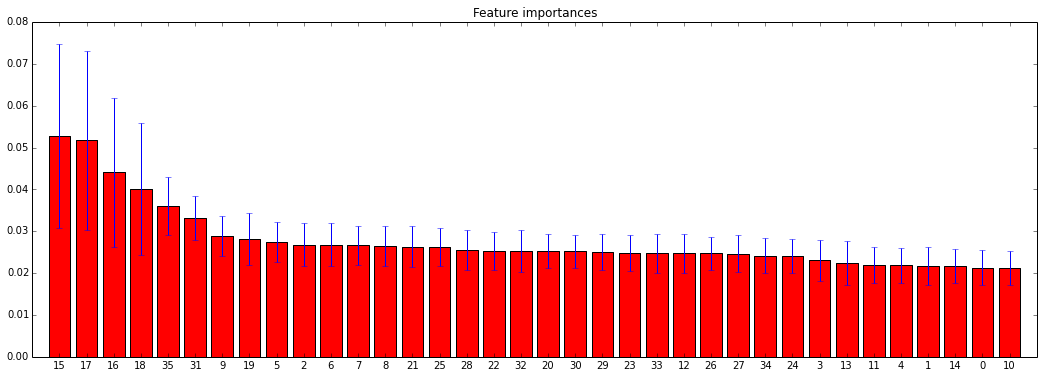

['dtw_det_sap_flux', 'det_sap_flux_std', 'det_sap_flux_mean', 'det_sap_flux_min', 'pos_corr2_max', 'pos_corr1_max', 'sap_bkg_max', 'det_sap_flux_max', 'dtw_sap_bkg', 'sap_flux_std', 'sap_bkg_mean', 'sap_bkg_std', 'sap_bkg_min', 'mom_centr1_std', 'mom_centr2_std', 'pos_corr1_mean', 'mom_centr1_min', 'pos_corr2_mean', 'mom_centr1_mean', 'pos_corr1_min', 'pos_corr1_std', 'mom_centr1_max', 'pos_corr2_std', 'pd_sap_flux_std', 'mom_centr2_min', 'mom_centr2_max', 'pos_corr2_min']

Number of features after feature selection: 27


In [10]:
# Divide candidate planets on their respective dataframe to perform final exoplanetary search
candidates = exoplanets_data[exoplanets_data['koi_disposition'] == 'CANDIDATE']
exoplanets = exoplanets_data[exoplanets_data['koi_disposition'] != 'CANDIDATE']

# Extract feature columns
feature_cols = list(exoplanets_data.columns[3:])

# Extract target column 'koi_disposition'
target_col = exoplanets_data.columns[2]

# Show the list of columns
print "Target column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively) also for candidates
X_all = exoplanets[feature_cols]
y_all = exoplanets[target_col]
X_candidates = candidates[feature_cols]

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_all, y_all)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(18, 6), dpi=80)
plt.title("Feature importances")
plt.bar(range(X_all.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_all.shape[1]), indices)
plt.xlim([-1, X_all.shape[1]])
plt.show()

# Remove last 25% of features
n_features_75 = int(n_features * 0.75)

# Extract feature columns
feature_cols = list(X_all.columns[indices[0:27]])

print feature_cols

X_all = X_all[feature_cols]
X_candidates = candidates[feature_cols]

print "\nNumber of features after feature selection: {}".format(X_all.shape[1])

Since I have decided to choose multiple Machine learning algorithm, I have created different functions to help me simplify the process.
- **train_classifier**: Is a function that fits the training data to the chosen classifier.
- **predict_labels**: Is a function that returns the precision score for an already fitted classifier.
- **predict**: Is a function that returns the prediction values for an already fitted classifier.
- **train_predict**: Is a function that returns the prediction values of training and testing data for an already fitted classifier.
- **k_fold_train_predict**: Is a function that performs k fold on a specific classifier.

In [11]:
def train_classifier(clf, X_train, y_train):

    # Fits a classifier to the training data.
    start = time()
    clf.fit(X_train, y_train)
    end = time()

    # Print the results
    # print "Trained model in {:.4f} seconds".format(end - start) [Debug]


def predict_labels(clf, features, target, confusion):

    # Makes predictions using a fit classifier based on Precision score.
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    # print "Made predictions in {:.4f} seconds.".format(end - start)
    
    if confusion:
        print "Confusion Matrix:"
        print confusion_matrix(target.values, y_pred, labels=['CONFIRMED', 'FALSE POSITIVE'])

    return precision_score(target.values, y_pred, pos_label='CONFIRMED')


def predict(clf, features):

    # Makes predictions using a fit classifier based on Precision score.
    start = time()
    y_pred = clf.predict(features)
    end = time()

    # Print and return results
    # print "\nMade predictions in {:.4f} seconds.".format(end - start)  [Debug]
    return y_pred


def train_predict(clf, X_train, y_train, X_test, y_test, confusion=False):
    # Train and predict using a classifer based on F1 score.

    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    train_predict = predict_labels(clf, X_train, y_train, confusion)
    test_predict = predict_labels(clf, X_test, y_test, confusion)
    
    # Print the results of prediction for both training and testing
    #print "Precision score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    #print "Precision score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))
    
    return train_predict, test_predict


def k_fold_train_predict(clf, kf, X_all):
    # Indicate the classifier
    print "\nTraining a {} ".format(clf.__class__.__name__)
    
    results = pd.DataFrame(columns=['score_train', 'score_test'])
    for train_index, test_index in kf:
        X_train, X_test = X_all.iloc[train_index], X_all.iloc[test_index]
        y_train, y_test = y_all.iloc[train_index], y_all.iloc[test_index]
        
        # Training and predicting the results for the model
        predict_train, predict_test = train_predict(clf, X_train, y_train, X_test, y_test)
        results.loc[len(results)] = [predict_train, predict_test]
        
    print "The average precision score for traing is {:.4f}" \
        .format(results['score_train'].describe()['mean'])
    print "The average precision score for traing is {:.4f}" \
        .format(results['score_test'].describe()['mean'])

Subsequently, I am initializing the different classifiers and performing a k-fold on each of them.

In [13]:
# Initialize the models
clf_A = GaussianNB()
clf_B = LogisticRegression()
clf_C = SVC()
clf_D = DecisionTreeClassifier()

kf = KFold(len(X_all), n_folds=10, shuffle=True)
#print kf [Debug]

k_fold_train_predict(clf_A, kf, X_all)
k_fold_train_predict(clf_B, kf, X_all)
k_fold_train_predict(clf_C, kf, X_all)
k_fold_train_predict(clf_D, kf, X_all)


Training a GaussianNB 
The average precision score for traing is 0.3787
The average precision score for traing is 0.3791

Training a LogisticRegression 
The average precision score for traing is 0.4715
The average precision score for traing is 0.6095

Training a SVC 
The average precision score for traing is 0.9945
The average precision score for traing is 0.9645

Training a DecisionTreeClassifier 
The average precision score for traing is 0.9838
The average precision score for traing is 0.6171


Finally, I am training and fitting the entire dataset to make sure the k-fold predictions are approximately correct, showing the confusion matrix to back up my assumptions.

In [14]:
# Set the number of training points to 75% of data set
num_train = int(np.floor(X_all.shape[0] * 0.75))

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=69)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])
print "Candidates set has {} samples".format(X_candidates.shape[0])

# Training and predicting the results for each model on the entire dataset
print "\nTraining a {} ".format(clf_A.__class__.__name__)
predict_train, predict_test = train_predict(clf_A, X_train, y_train, X_test, y_test, True)
print "Precision score for training set: {:.4f}.".format(predict_train)
print "Precision score for test set: {:.4f}.".format(predict_test)

print "\nTraining a {} ".format(clf_B.__class__.__name__)
predict_train, predict_test = train_predict(clf_B, X_train, y_train, X_test, y_test, True)
print "Precision score for training set: {:.4f}.".format(predict_train)
print "Precision score for test set: {:.4f}.".format(predict_test)

print "\nTraining a {} ".format(clf_C.__class__.__name__)
predict_train, predict_test = train_predict(clf_C, X_train, y_train, X_test, y_test, True)
print "Precision score for training set: {:.4f}.".format(predict_train)
print "Precision score for test set: {:.4f}.".format(predict_test)

print "\nTraining a {} ".format(clf_D.__class__.__name__)
predict_train, predict_test =train_predict(clf_D, X_train, y_train, X_test, y_test, True)
print "Precision score for training set: {:.4f}.".format(predict_train)
print "Precision score for test set: {:.4f}.".format(predict_test)

Training set has 3941 samples.
Testing set has 1314 samples.
Candidates set has 1975 samples

Training a GaussianNB 
Confusion Matrix:
[[1370   64]
 [2277  230]]
Confusion Matrix:
[[470  26]
 [751  67]]
Precision score for training set: 0.3757.
Precision score for test set: 0.3849.

Training a LogisticRegression 
Confusion Matrix:
[[  26 1408]
 [  24 2483]]
Confusion Matrix:
[[  2 494]
 [ 15 803]]
Precision score for training set: 0.5200.
Precision score for test set: 0.1176.

Training a SVC 
Confusion Matrix:
[[1418   16]
 [   5 2502]]
Confusion Matrix:
[[192 304]
 [  7 811]]
Precision score for training set: 0.9965.
Precision score for test set: 0.9648.

Training a DecisionTreeClassifier 
Confusion Matrix:
[[1434    0]
 [  21 2486]]
Confusion Matrix:
[[325 171]
 [189 629]]
Precision score for training set: 0.9856.
Precision score for test set: 0.6323.


The DecisionTreeClassifier seems to perform really well on training; However, it does not generalize very well. Logistic Regression and Naive Bayse do not seem to fit the data. 

From the following results, the SVC is the model that perform best on this data set, with a precision score for the test dataset equal to 0.9648. Even though SVC is negatively biased, preferring False Positive, I am okay with that bias. Indeed, this is a discovery project, therefore, I would prefer that the algorithm is negatively biased instead of being positively biased. Meaning that the planets the algorithm recognizes really are confirmed exoplanet.

If the algorithm classifies something as false positive, the status of the planet will remain still as Candidate.

Finally, I wanted to point out that there weren't any complications that occurred during the coding process of this section. 

### Refinement
I have tried to perform a GridSearch on the SVC classifier; however, it does seem that any improvement has been reported on the algorithm. As you can see from the confusion matrix nothing changes from the previous reported matrix to the matrix after tuning.

The parameter I have tuned for the GridSearch, with their respective range, are: C [-2, 10], gamma [-5,5], and degree [1,6]. The Final model has C = 10,  degree=10, and gamma = 0.0031622.

Another thing to be noticed is that I have tried to perform normalization on the dataset; however, the SVC model did not work at all. This behavior is due to the fact that the data is been already pre-processed. Moreover, relevant features like DTW data points would loose their applicability on the overall model.

In [15]:
# Create the parameters list to tune
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-5, 5, 5)
degree_range = np.logspace(1, 6, 6)
parameters = dict(gamma=gamma_range, C=C_range, degree=degree_range)

# Initialize the classifier
clf = SVC()

# Make an Precision scoring function using 'make_scorer'
precision_scorer = make_scorer(precision_score, pos_label="CONFIRMED")

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=precision_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "\nTuned model has a training precision score of {:.4f}." \
    .format(predict_labels(clf, X_train, y_train, True))
print "Tuned model has a testing precision score of {:.4f}." \
.format(predict_labels(clf, X_test, y_test, True))

Confusion Matrix:
[[1418   16]
 [   5 2502]]

Tuned model has a training precision score of 0.9965.
Confusion Matrix:
[[192 304]
 [  7 811]]
Tuned model has a testing precision score of 0.9648.


## IV. Results

In [16]:
def discover_possible_exoplanets(clf, X_candidates, candidates):
    # Setting up confirmed and false positive array
    confirmed = []
    false_positive = []
    
    # Predicting the candidate exoplanets
    results = pd.Series(predict(clf, X_candidates), index=candidates.index)
    candidates.insert(3, 'koi_disposition_pred', results)
    
    # Looping trough all the planets predictions
    for index, planet in candidates.iterrows():
        if planet['koi_disposition_pred'] == 'CONFIRMED':
            confirmed.append({ 'name': planet['kepoi_name'], 'index': planet['index']})
        else:
            false_positive.append({'name': planet['kepoi_name'], 'index': planet['index']})

    discovery_rate = float(len(confirmed))/candidates.shape[0]*100

    print "\nExoplanets: {} have been Confirmed!".format(len(confirmed))
    print "\nExoplanets: {} are False Positive!".format(len(false_positive))
    print "\nDiscovery Rate: {:.4f}%".format(discovery_rate)

discover_possible_exoplanets(clf,X_candidates, candidates)


Exoplanets: 144 have been Confirmed!

Exoplanets: 1831 are False Positive!

Discovery Rate: 7.2911%


### Model Evaluation and Validation
The support Vector Classifier (SVC) works better than predicted, even though is a little bit negatively biased, as you can see from the confusion matrix. As a matter of fact, the model has been tested with various inputs to evaluate whether the model generalizes well to unseen data. Indeed, the average precision score for the k-fold testing set is 0.9645 and the precision score of the entire dataset is 0.9648.

Further, I was pleasantly surprised to discover that the model prediction on the still candidate planets confirmed 144 exoplanets. I am not an astrophysicist, so there are no ways for me to validate this prediction. The only way would be scientist releasing results on the candidate planets and compare those results with the prediction from the model.

### Justification
The final results found are stronger than the benchmark results reported earlier. Indeed, I predicted that the precision score would have been 60%; however, the score I got was 96.48%.  I was not expecting such an amazing prediction. I believed that the data processing step contributed a lot to this results. The Dynamic Time Wrapping algorithm does an amazing job to compare the light curves, and without it I would have never reported this results. This machine learning approach would facilitate a lot the exoplanetary search for scientists.

## V. Conclusion

### Free-Form Visualization
One thing I want to point out is the fact that at the beginning I thought that the light curves the dynamic time wrapping algorithm could not process meant something. Therefore, I performed an analysis to see if there was any correlation between the number of dropped planets and their relative category (candidate, false positive, confirmed). As the plot below shows, there is not any correlation between the dropping rate and relative category of a planet. Indeed, the ratio of the number of each category dropped over the total number of planet for the respective category is between 0.15 and 0.20. This is consistent either between the 3 category, and with the total dropping rate of the dataset, which is 18.07%. I assume that my implementation of the DTW does not perform well with parallelized computing. ![Dropping Rate Ratio](images/dropping_rate_ratio.png "Dropping Rate Ratio")

### Reflection
This project started thanks to my passion for astrophysics. The first, and most difficult step was to collect the data of all the exoplanet, and processing it. Subsequently, the data had to be fitted to different models to check which one would perform best. Finally, with the best model, predict the faith of the still candidate exoplanets.

The entire project was difficult to put together, but at the same time rewarding thanks to the results obtained. I learned a lot about astrophysics, and the final results exceeded my  expectations.

### Improvement
One improvement that could be performed in the data processing section is to use a different algorithm to compare the two light curves. Indeed, while I was researching, I found this algorithm called Fast Time Series Evaluation (FTSE)[6], that could have given a faster and more accurate result compared with the Dynamic Time Warping algorithm. However, the research paper was not really clear on how the implement the algorithm, and I ended up using DTW.

Another improvement that could be performed is to refactor the code, setting the target labels to boolean values, and implement other statistical machine learning algorithms, such as perceptron, and k-nearest neighbors.

Another approach to this problem would have been using the photos taken from the Kepler telescope and apply a Deep Neural Networks to recognize planetary transit. However, this would have taken more time than required, and would have been out of scope.

## Citations

[1]
*A Jupiter-mass companion to a solar-type star*.
**Michel Mayor & Didier Queloz**.
http://www.nature.com/nature/journal/v378/n6555/abs/378355a0.html
Nature, 378, 355-359.
November 23, 1995.

[2]
*Kepler Mission/QuickGuide*.
**Nasa Staff**.
http://kepler.nasa.gov/Mission/QuickGuide/
July 25, 2016.

[3]
*Kepler Archive Manual*.
**Nasa**.
http://archive.stsci.edu/kepler/manuals/archive_manual.pdf
July 28, 2016.

[4]
*Everything you know about Dynamic Time Warping is Wrong*.
**Chotirat Ratanamahatana & Eamonn Keogh **.
http://wearables.cc.gatech.edu/paper_of_week/DTW_myths.pdf
University of California, Riverside.
July 28, 2016.

[5]
*Using Dynamic Time Warping toFind Patterns in Time Serie*.
**Donald J. Bemd & James Cliffor**.
http://www.aaai.org/Papers/Workshops/1994/WS-94-03/WS94-03-031.pdf
New York University, New York.
July 28, 2016.

[6]
*An Efficient and Accurate Method for Evaluating Time Series Similarity*.
**Michael Morse & Jignesh M. Patel**.
http://dbgroup.eecs.umich.edu/files/sigmod07timeseries.pdf
University of Michigan Ann Arbor, Michigan.
August 02, 2016.